# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

Taken from UDEMY course 100 Days of Code: The Complete Python Pro Bootcamp. All solutions by mo1der.

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [5]:
us_states_names_codes = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
us_states_codes_names = dict(map(reversed, us_states_names_codes.items()))

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
# Median_Household_Income_2015
selected_dataframe = df_hh_income
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n sample data: \n{selected_dataframe.sample(5)}')


df_hh_income analysis: 
 shape: (29322, 3), rows: 29322, columns: 3
 columns names are: Geographic Area, City, Median Income
 NaN values: True Median Income, 
 duplicates: False
 sample data: 
      Geographic Area                    City Median Income
28583              WI     Forestville village         42031
9318               KS             Fulton city         27083
640                AK        Chuathbaluk city         43750
2370               CA  Emerald Lake Hills CDP        164643
26173              TX         Volente village        111250


In [7]:
# Pct_People_Below_Poverty_Level
selected_dataframe = df_pct_poverty
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n sample data: \n{selected_dataframe.sample(5)}')


df_pct_poverty analysis: 
 shape: (29329, 3), rows: 29329, columns: 3
 columns names are: Geographic Area, City, poverty_rate
 NaN values: False 
 duplicates: False
 sample data: 
      Geographic Area              City poverty_rate
22                 AL     Ashville city         28.3
7713               IN      Kennard town         24.6
12505              MN      Calumet city         29.6
18142              NC      Caroleen CDP         10.6
22684              PA  Pardeesville CDP          2.2


In [8]:
# Pct_Over_25_Completed_High_School
selected_dataframe = df_pct_completed_hs
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n sample data: \n{selected_dataframe.sample(5)}')


df_pct_completed_hs analysis: 
 shape: (29329, 3), rows: 29329, columns: 3
 columns names are: Geographic Area, City, percent_completed_hs
 NaN values: False 
 duplicates: False
 sample data: 
      Geographic Area                    City percent_completed_hs
21495              OR            Westfir city                 93.2
11197              MD           Kettering CDP                   95
4552               FL  Lakeland Highlands CDP                 94.4
6307               IL       Coatsburg village                 86.6
6521               IL          Gillespie city                   92


In [9]:
# Share_of_Race_By_City
selected_dataframe = df_share_race_city
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n samle data: \n{selected_dataframe.sample(5)}')

df_share_race_city analysis: 
 shape: (29268, 7), rows: 29268, columns: 7
 columns names are: Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic
 NaN values: False 
 duplicates: False
 samle data: 
      Geographic area              City share_white share_black  \
4869               FL   Silver Lake CDP        88.3         5.3   
13508              MS      Pachuta town          69        30.7   
18753              ND       Almont city         100           0   
22252              PA  Lake Latonka CDP        98.9         0.2   
13167              MN      Thomson city        96.9           0   

      share_native_american share_asian share_hispanic  
4869                    0.2         3.3            3.9  
13508                   0.4           0              0  
18753                     0           0              0  
22252                   0.1         0.2            0.5  
13167                   1.3         0.6              0  


In [10]:
# Deaths_by_Police_US
selected_dataframe = df_fatalities
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n samle data: \n{selected_dataframe.sample(5)}')


df_fatalities analysis: 
 shape: (2535, 14), rows: 2535, columns: 14
 columns names are: id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera
 NaN values: True armed, age, race, flee, 
 duplicates: False
 samle data: 
        id                  name      date manner_of_death       armed   age  \
8       16         Autumn Steele  06/01/15            shot     unarmed 34.00   
2511  2795          Walter Lynde  23/07/17            shot  toy weapon 49.00   
825    970     Bennie Lee Tignor  31/10/15            shot     unarmed 56.00   
844    993  Dale Maverick Hudson  09/11/15            shot         gun 26.00   
2272  2529         Fred Cardenas  25/04/17            shot         gun 53.00   

     gender race            city state  signs_of_mental_illness threat_level  \
8         F    W      Burlington    IA                    False        other   
2511      M    W         Spencer    MA                    False  

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
# df_hh_income analysis: 
# NaN values: True Median Income, 

In [12]:
# df_pct_poverty analysis:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace('-','0') 

In [13]:
# df_pct_completed_hs analysis:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace('-','0') 

In [14]:
# df_fatalities analysis: 
# NaN values: True armed, age, race, flee, 
df_fatalities.armed.value_counts()

In [93]:
# df_fatalities.armed changing NaN values to undetermined
df_fatalities.loc[df_fatalities.armed.isna(), "armed"] = "undetermined"

In [94]:
# df_fatalities.age changing NaN values to 0
df_fatalities.age = df_fatalities.age.fillna(0)   

In [18]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [19]:
# df_fatalities.race changing NaN values to O - other
df_fatalities.loc[df_fatalities.race.isna(), "race"] = "O"

In [20]:
def get_state_name(state_code):
    return us_states_codes_names.get(state_code)
df_fatalities['state_name'] = df_fatalities['state'].apply(get_state_name)

In [21]:
df_fatalities.flee.value_counts()

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [22]:
# df_fatalities.flee changing NaN values to Other
df_fatalities.loc[df_fatalities.flee.isna(), "flee"] = "Other"

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [23]:
df_pct_poverty.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [24]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype('float64')

In [25]:
# we are not taking into consideration rows with poverty rate 0 as that would make our analysis with error
us_states_by_poverty_rate = df_pct_poverty.copy()
us_states_by_poverty_rate = us_states_by_poverty_rate.drop(us_states_by_poverty_rate.loc[us_states_by_poverty_rate.poverty_rate == 0].index) 
us_states_by_poverty_rate = df_pct_poverty.groupby(by="Geographic Area").agg({'poverty_rate': pd.Series.mean})
us_states_by_poverty_rate.sort_values(by=['poverty_rate'], ascending=False, inplace=True)
us_states_by_poverty_rate = us_states_by_poverty_rate.reset_index()

In [26]:
# adding new column with state name
def get_state_name(state_code):
    return us_states_codes_names.get(state_code)
us_states_by_poverty_rate['state_name'] = us_states_by_poverty_rate['Geographic Area'].apply(get_state_name)
us_states_by_poverty_rate[:3]

,Geographic Area,poverty_rate,state_name
0,MS,26.88,Mississippi
1,AZ,25.27,Arizona
2,GA,23.66,Georgia


In [27]:
# us_states_by_poverty_rate.loc[us_states_by_poverty_rate.poverty_rate.idxmax(), 'state_name']
print(f'State that has the highest poverty rate {round(us_states_by_poverty_rate.poverty_rate.max(),1)}% is {us_states_by_poverty_rate.loc[us_states_by_poverty_rate.poverty_rate.idxmax(), "state_name"]}, while state that has the lowest poverty rate {round(us_states_by_poverty_rate.poverty_rate.min(),1)}% is {us_states_by_poverty_rate.loc[us_states_by_poverty_rate.poverty_rate.idxmin(), "state_name"]}.')

State that has the highest poverty rate 26.9% is Mississippi, while state that has the lowest poverty rate 8.2% is New Jersey.


In [28]:
bar = px.bar(x=us_states_by_poverty_rate['Geographic Area'],
             y=us_states_by_poverty_rate.poverty_rate,
             color=us_states_by_poverty_rate.poverty_rate,
             color_continuous_scale=px.colors.sequential.haline,
             title="Poverty Rate in each US State",
             hover_name=us_states_by_poverty_rate.state_name,
             )
bar.update_layout(xaxis_title='State name', 
                  yaxis_title='Poverty rate in %',
                  )
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [29]:
df_pct_completed_hs.sample(5)

,Geographic Area,City,percent_completed_hs
27715,WA,Northport town,86.1
18115,NC,Bowmore CDP,100
21841,PA,Crafton borough,95.8
24164,TN,Chattanooga city,85.2
11432,MD,Whitehaven CDP,100


In [30]:
df_pct_completed_hs.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [31]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype('float64')

In [32]:
us_states_by_graduation_rate = df_pct_completed_hs.copy()

In [33]:
us_states_by_graduation_rate = us_states_by_graduation_rate.drop(us_states_by_graduation_rate.loc[us_states_by_graduation_rate.percent_completed_hs == 0].index) 
us_states_by_graduation_rate = us_states_by_graduation_rate.groupby(by="Geographic Area").agg({'percent_completed_hs': pd.Series.mean})
us_states_by_graduation_rate.sort_values(by=['percent_completed_hs'], ascending=False, inplace=True)
us_states_by_graduation_rate = us_states_by_graduation_rate.reset_index()
us_states_by_graduation_rate['state_name'] = us_states_by_graduation_rate['Geographic Area'].apply(get_state_name)
us_states_by_graduation_rate[:3]


,Geographic Area,percent_completed_hs,state_name
0,MA,92.40,Massachusetts
1,WY,92.10,Wyoming
2,HI,91.67,Hawaii


In [34]:
print(f'State that has the highest graduation rate {round(us_states_by_graduation_rate.percent_completed_hs.max(),1)}% is {us_states_by_graduation_rate.loc[us_states_by_graduation_rate.percent_completed_hs.idxmax(), "state_name"]}, while state that has the lowest graduation rate {round(us_states_by_graduation_rate.percent_completed_hs.min(),1)}% is {us_states_by_graduation_rate.loc[us_states_by_graduation_rate.percent_completed_hs.idxmin(), "state_name"]}.')

State that has the highest graduation rate 92.4% is Massachusetts, while state that has the lowest graduation rate 76.8% is Texas.


In [35]:
bar2 = px.bar(x=us_states_by_graduation_rate['Geographic Area'],
             y=us_states_by_graduation_rate.percent_completed_hs,
             color=us_states_by_graduation_rate.percent_completed_hs,
             color_continuous_scale=px.colors.sequential.haline,
             title="Graduation Rate in each US State",
             hover_name=us_states_by_graduation_rate.state_name,
             )
bar2.update_layout(xaxis_title='State name', 
                  yaxis_title='Graduation rate in %',
                  yaxis=dict(range=[75, 100]),
                  )
bar2.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

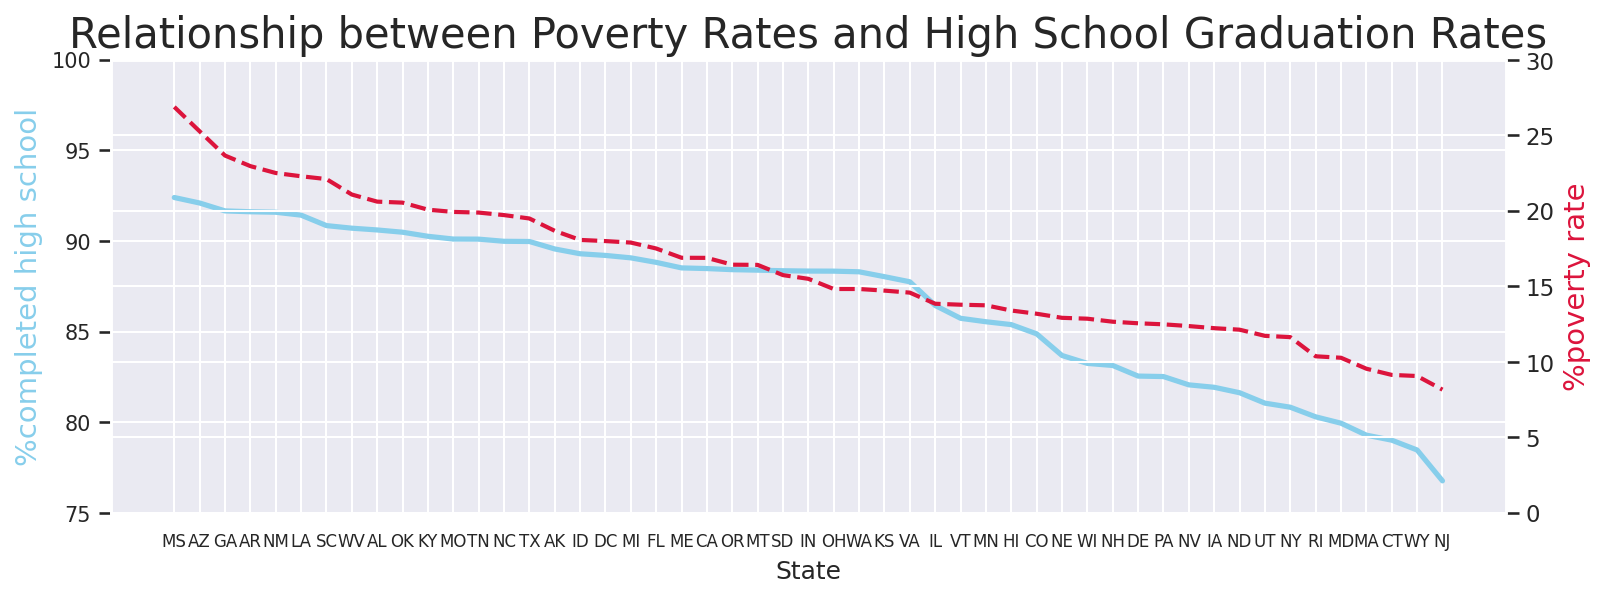

In [98]:
plt.figure(figsize=(12,4), dpi=150)
plt.yticks(fontsize=10)
plt.xticks(fontsize=8, rotation=0)

ax1 = plt.gca() 
ax2 = ax1.twinx() 

ax1.plot(us_states_by_graduation_rate['Geographic Area'], us_states_by_graduation_rate.percent_completed_hs, color="skyblue", linewidth=2.5, label="Graduation rate")
ax2.plot(us_states_by_poverty_rate['Geographic Area'], us_states_by_poverty_rate.poverty_rate, color="crimson", linewidth=2, linestyle = '--', label="Poverty rate")

ax1.set_xlabel("State")

ax1.set_ylabel("%completed high school", color="skyblue", fontsize=14)
ax2.set_ylabel("%poverty rate", color="crimson", fontsize=14)

ax1.set_ylim(75, 100)
ax2.set_ylim(0,30)



plt.title('Relationship between Poverty Rates and High School Graduation Rates')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [37]:
us_states_graduation_poverty_combined = pd.merge(us_states_by_graduation_rate, us_states_by_poverty_rate, on='state_name', how='left')

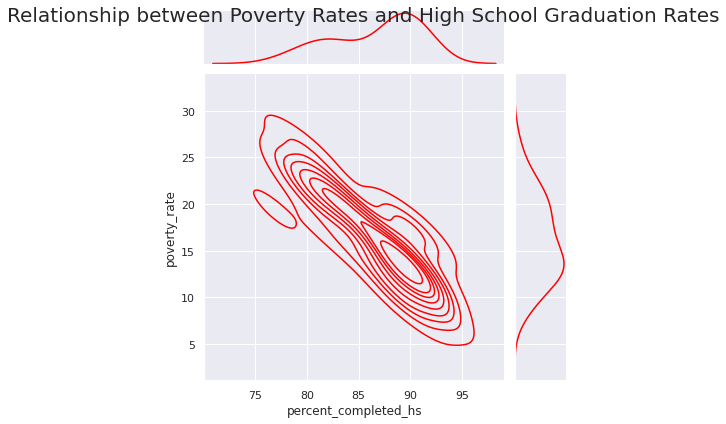

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10), 'axes.titlesize':20})
sns.jointplot(x="percent_completed_hs", y="poverty_rate", data=us_states_graduation_poverty_combined, color="red", kind="kde")
plt.xlabel("High School Graduation Rate (%)", fontsize=16)
plt.ylabel("Poverty Rate (%)", fontsize=16)
plt.suptitle('Relationship between Poverty Rates and High School Graduation Rates', fontsize=20)
plt.show()

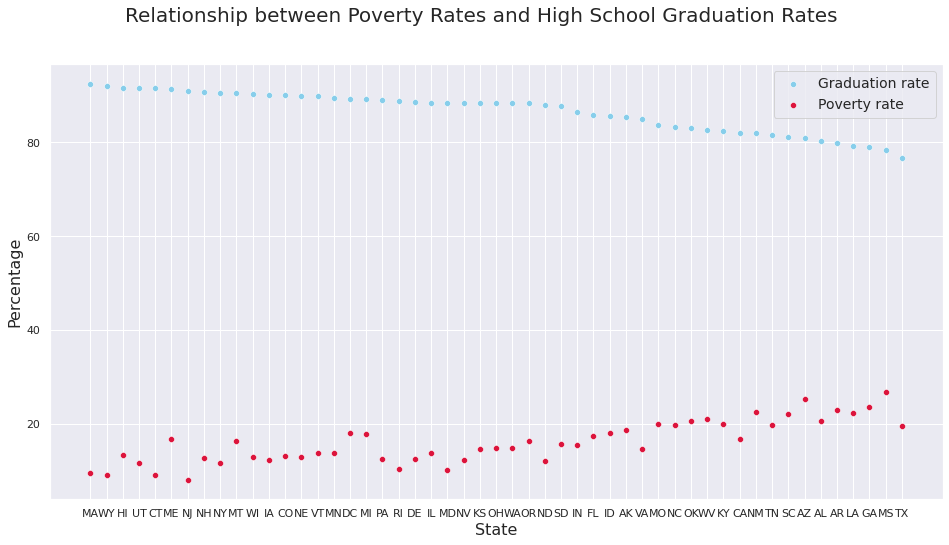

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,8), 'axes.titlesize':20})

sns.scatterplot(x="Geographic Area", y="percent_completed_hs", data=us_states_by_graduation_rate, color="skyblue", label="Graduation rate")
sns.scatterplot(x="Geographic Area", y="poverty_rate", data=us_states_by_poverty_rate, color="crimson", label="Poverty rate")

plt.xlabel("State", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.legend(fontsize=14)
plt.suptitle('Relationship between Poverty Rates and High School Graduation Rates', fontsize=20)
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

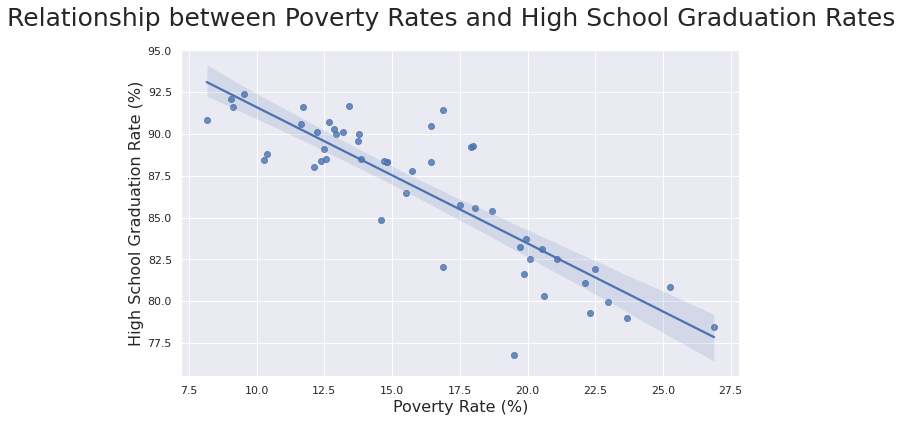

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,6), 'axes.titlesize':20})

sns.regplot(x="poverty_rate", y="percent_completed_hs", data=us_states_graduation_poverty_combined)

plt.xlabel("Poverty Rate (%)", fontsize=16)
plt.ylabel("High School Graduation Rate (%)", fontsize=16)
plt.suptitle('Relationship between Poverty Rates and High School Graduation Rates', fontsize=25)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [41]:
df_share_race_city[:3]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [42]:
df_share_race_city = df_share_race_city[df_share_race_city["share_white"]  != "(X)"]
df_share_race_city = df_share_race_city[df_share_race_city["share_black"]   != "(X)"]
df_share_race_city = df_share_race_city[df_share_race_city["share_native_american"]  != "(X)"]
df_share_race_city = df_share_race_city[df_share_race_city["share_asian"]  != "(X)"]
df_share_race_city = df_share_race_city[df_share_race_city["share_hispanic"]  != "(X)"]
df_share_race_city["share_white"] = df_share_race_city["share_white"].astype(float)
df_share_race_city["share_black"] = df_share_race_city["share_black"].astype(float)
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].astype(float)
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].astype(float)
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].astype(float)
def get_state_name(state_code): return us_states_codes_names.get(state_code)
df_share_race_state = df_share_race_city.groupby(by=["Geographic area"], as_index=False).agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})   
df_share_race_state['state_name'] = df_share_race_state['Geographic area'].apply(get_state_name)
df_share_race_state[:5]

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic,state_name
0,AK,45.65,0.57,45.86,1.39,2.15,Alaska
1,AL,72.51,23.32,0.66,0.48,2.98,Alabama
2,AR,78.45,16.30,0.76,0.48,4.27,Arkansas
3,AZ,59.93,0.95,28.59,0.73,20.14,Arizona
4,CA,71.87,2.69,1.72,5.57,29.65,California


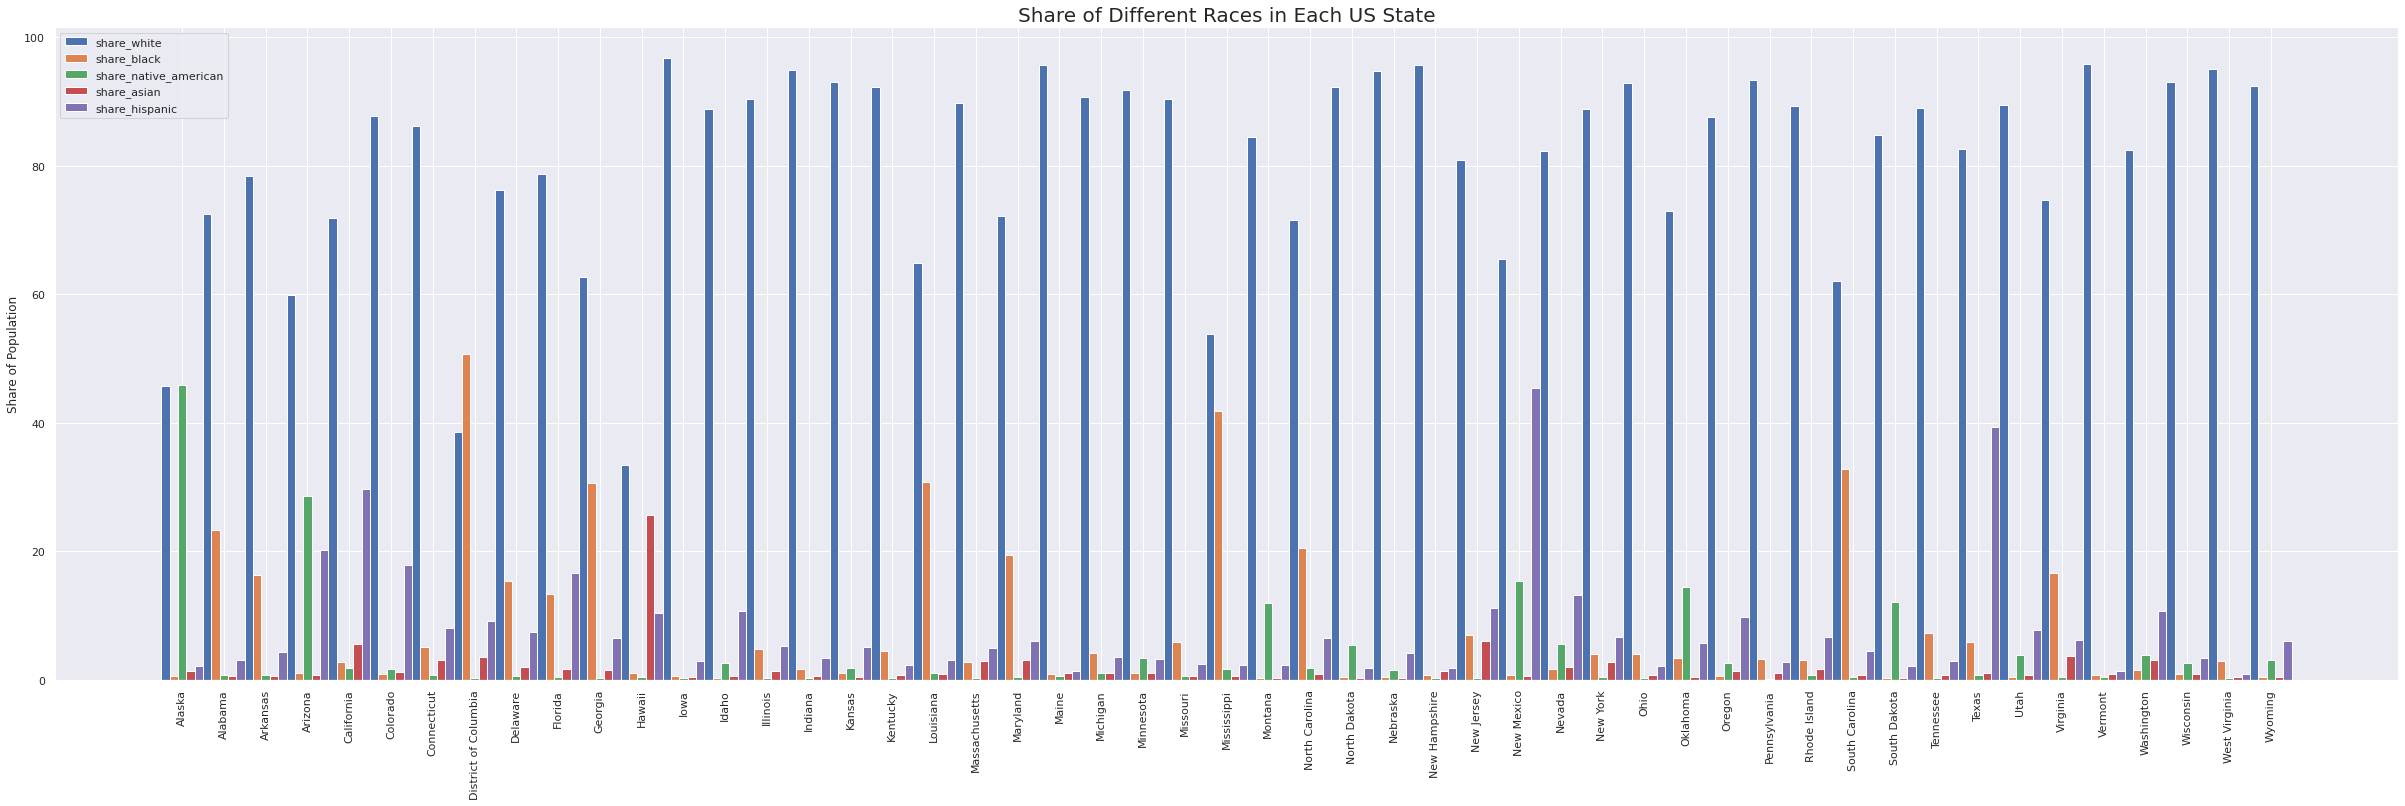

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of the different race categories
races = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Set the width of each bar
bar_width = 0.2

# Set the position of each bar
bar_positions = np.arange(len(df_share_race_state))

# Plot each race category as a sub-section of a bar
for i, race in enumerate(races):
    plt.bar(bar_positions + i * bar_width, df_share_race_state[race], bar_width, label=race)

# Add the x-axis labels
plt.xticks(bar_positions + 2 * bar_width, df_share_race_state["state_name"], rotation=90)

# Add the y-axis label
plt.ylabel("Share of Population")

# Add the chart title
plt.title("Share of Different Races in Each US State")

# Add the legend
plt.legend()
plt.gcf().set_size_inches(42,12)
# Show the chart
plt.show()


In [44]:
fig = px.choropleth(df_share_race_state,
    locations="Geographic area",
    color="share_white",
    title="Share of White Population by US State",
    color_continuous_scale=px.colors.sequential.Reds,
    locationmode="USA-states",
    scope='usa',
    hover_data=["state_name"])
fig.show()
fig2 = px.choropleth(df_share_race_state,
    locations="Geographic area",
    color="share_black",
    title="Share of Black Population by US State",
    color_continuous_scale=px.colors.sequential.Reds,
    locationmode="USA-states",
    scope='usa',
    hover_data=["state_name"])
fig2.show()
fig3 = px.choropleth(df_share_race_state,
    locations="Geographic area",
    color="share_native_american",
    title="Share of Native American Population by US State",
    color_continuous_scale=px.colors.sequential.Reds,
    locationmode="USA-states",
    scope='usa',
    hover_data=["state_name"])
fig3.show()
fig4 = px.choropleth(df_share_race_state,
    locations="Geographic area",
    color="share_asian",
    title="Share of Asian Population by US State",
    color_continuous_scale=px.colors.sequential.Reds,
    locationmode="USA-states",
    scope='usa',
    hover_data=["state_name"])
fig4.show()
fig5 = px.choropleth(df_share_race_state,
    locations="Geographic area",
    color="share_hispanic",
    title="Share of Hispanic Population by US State",
    color_continuous_scale=px.colors.sequential.Reds,
    locationmode="USA-states",
    scope='usa',
    hover_data=["state_name"])
fig5.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [45]:
killed_by_race = df_fatalities.race.value_counts()
killed_by_race = pd.DataFrame(killed_by_race)
killed_by_race.reset_index(inplace=True)
killed_by_race.rename(columns={'index':'race', 'race':'killed'}, inplace=True)
dict_of_races = {'W':'white', 'B':'black', 'N':'native american', 'A':'asian', 'H':'hispanic', 'O':'other'}
killed_by_race["race_name"] = killed_by_race["race"].map(dict_of_races)

In [46]:
fig_killed_by_race = px.pie(
    labels=killed_by_race.race_name,
    values=killed_by_race.killed,
    title="Race of People Killed",
    names=killed_by_race.race_name,
    hole=0.3)
fig_killed_by_race.update_traces(
    textposition='inside', 
    textfont_size=15,
    textinfo='percent+label')
fig_killed_by_race.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [47]:
df_fatalities[:2]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_name
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Washington
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,Oregon


In [48]:
killed_by_gender = df_fatalities.gender.value_counts()
killed_by_gender = pd.DataFrame(killed_by_gender)
killed_by_gender.reset_index(inplace=True)
killed_by_gender.rename(columns={'index':'gender', 'gender':'killed'}, inplace=True)
dict_of_genders = {'M':'male', 'F':'female'}
killed_by_gender["gender_name"] = killed_by_gender["gender"].map(dict_of_genders)
killed_by_gender

,gender,killed,gender_name
0,M,2428,male
1,F,107,female


In [49]:
fig_killed_by_gender = px.pie(
    labels=killed_by_gender.gender_name,
    values=killed_by_gender.killed,
    title="Percent of Deaths of Men and Women",
    names=killed_by_gender.gender_name,
    hole=0.3)
fig_killed_by_gender.update_traces(
    textposition='inside', 
    textfont_size=15,
    textinfo='percent+label',)
fig_killed_by_gender.update_layout(
    width=400,
    height=400,)
fig_killed_by_gender.show()

In [50]:
bar_killed_by_gender = px.bar(
    x = killed_by_gender.gender_name,
    y = killed_by_gender.killed,
    title="Total Number of Deaths of Men and Women",
    color=['red', 'blue'],
    hover_name=killed_by_gender.gender_name,
    text=killed_by_gender.killed,)
bar_killed_by_gender.update_layout(
    xaxis_title='Gender', 
    yaxis_title='Number of Deaths',
    coloraxis_showscale=False,
    showlegend=False,
    width=400,
    height=400,)
bar_killed_by_gender.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [51]:
# Create the 5 age ranges
age_ranges = [0, 20, 40, 60, 80, 100]
age_range_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create a new column "age_range" by dividing the "age" column into the specified ranges
df_fatalities['age_range'] = pd.cut(df_fatalities['age'], bins=age_ranges, labels=age_range_labels, right=False)

# Group the data by the "age_range" and "manner_of_death" columns and count the number of occurrences in each group
manner_of_death_by_age = df_fatalities.groupby(by=["age_range", "manner_of_death"]).agg({'name': pd.Series.count})
# manner_of_death_by_age.reset_index(inplace=True)
manner_of_death_by_age.rename(columns={'name':'deaths'}, inplace=True)
manner_of_death_by_age


deaths
age_range manner_of_death          
0-20      shot               211.00
          shot and Tasered    12.00
20-40     shot             1,341.00
          shot and Tasered    99.00
40-60     shot               685.00
          shot and Tasered    53.00
60-80     shot               118.00
          shot and Tasered     8.00
80-100    shot                 8.00
          shot and Tasered      NaN

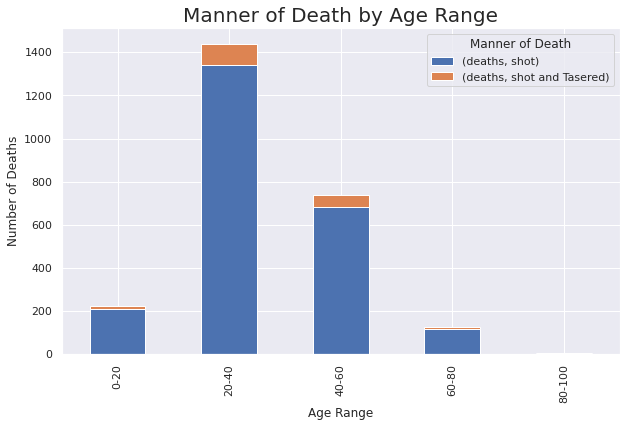

In [52]:
import matplotlib.pyplot as plt

# Unstack the data so that it is in a format that is suitable for plotting
unstacked_data = manner_of_death_by_age.unstack(level=-1)

# Plot the data as a bar plot
ax = unstacked_data.plot(kind='bar', stacked=True)

# Add a title and labels to the x- and y-axes
ax.set_title("Manner of Death by Age Range")
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Deaths")
plt.grid(True)
ax.legend(title="Manner of Death")
# Show the plot
plt.show()


In [53]:
import pandas as pd

# Your existing code:
manner_of_death_by_age = df_fatalities.groupby(by=["age", "manner_of_death"]).agg({'name': pd.Series.count})
manner_of_death_by_age['age_compartment'] = pd.cut(manner_of_death_by_age.index.get_level_values(0), 5, labels=False)
manner_of_death_by_age = manner_of_death_by_age.groupby(by=["age_compartment", "manner_of_death"]).agg({'name': pd.Series.sum})
manner_of_death_by_age.reset_index(inplace=True)

# Create the custom function that returns the range of values for each compartment
def get_range(age_compartment):
    age_min = df_fatalities["age"].min() + age_compartment * (df_fatalities["age"].max() - df_fatalities["age"].min())/5
    age_max = df_fatalities["age"].min() + (age_compartment+1) * (df_fatalities["age"].max() - df_fatalities["age"].min())/5
    return f"{age_min:.2f} to {age_max:.2f}"

# Apply the custom function to the age_compartment column
manner_of_death_by_age["age_range"] = manner_of_death_by_age["age_compartment"].apply(get_range)
manner_of_death_by_age


,age_compartment,manner_of_death,name,age_range
0,0,shot,171,0.00 to 18.20
1,0,shot and Tasered,11,0.00 to 18.20
2,1,shot,1214,18.20 to 36.40
3,1,shot and Tasered,85,18.20 to 36.40
4,2,shot,728,36.40 to 54.60
5,2,shot and Tasered,63,36.40 to 54.60
6,3,shot,229,54.60 to 72.80
7,3,shot and Tasered,12,54.60 to 72.80
8,4,shot,21,72.80 to 91.00
9,4,shot and Tasered,1,72.80 to 91.00


In [54]:
manner_of_death_by_gender = df_fatalities.groupby(by=["gender", "manner_of_death"]).agg({'name': pd.Series.count})
manner_of_death_by_gender.reset_index(inplace=True)
manner_of_death_by_gender['manner_perc'] = manner_of_death_by_gender.groupby('gender')['name'].transform(lambda x: x / x.sum() * 100)
dict_of_genders = {'M':'male', 'F':'female'}
manner_of_death_by_gender["gender_name"] = manner_of_death_by_gender["gender"].map(dict_of_genders)
manner_of_death_by_gender.rename(columns={'name':'number'}, inplace=True)
manner_of_death_by_gender = manner_of_death_by_gender[[manner_of_death_by_gender.columns[i] for i in [0, 4, 1, 2, 3]]]
manner_of_death_by_gender

,gender,gender_name,manner_of_death,number,manner_perc
0,F,female,shot,102,95.33
1,F,female,shot and Tasered,5,4.67
2,M,male,shot,2261,93.12
3,M,male,shot and Tasered,167,6.88


In [55]:
# Create a contingency table
manner_of_death_by_gender2 = pd.pivot_table(manner_of_death_by_gender, 
index='gender_name', 
columns='manner_of_death', 
values='number',
aggfunc='sum')
margins=True
manner_of_death_by_gender2 = pd.DataFrame(manner_of_death_by_gender2)
manner_of_death_by_gender2.reset_index(inplace=True)
manner_of_death_by_gender2 = manner_of_death_by_gender2.set_index("gender_name")
manner_of_death_by_gender2

manner_of_death,shot,shot and Tasered
gender_name,,
female,102,5
male,2261,167


In [56]:
# Calculate the expected values for each cell in the contingency table
import numpy as np

def expected_value(row, col_totals, total):
    return row * col_totals / total

total = manner_of_death_by_gender2.sum().sum()
col_totals = manner_of_death_by_gender2.sum()
row_totals = manner_of_death_by_gender2.sum(axis=1)

expected = np.outer(row_totals, col_totals) / total
manner_of_death_by_gender2_expected = pd.DataFrame(expected, columns=manner_of_death_by_gender2.columns, index=manner_of_death_by_gender2.index)
manner_of_death_by_gender2_expected


manner_of_death,shot,shot and Tasered
gender_name,,
female,99.74,7.26
male,"2,263.26",164.74


In [57]:
# Calculate the chi-squared statistic
observed = manner_of_death_by_gender2.values
expected = manner_of_death_by_gender2_expected.values

chi_squared = ((observed - expected) ** 2 / expected).sum().sum()
chi_squared

0.7879723521851699

In [58]:
# Determine the degrees of freedom (df) for the test
df = (manner_of_death_by_gender2.shape[0] - 1) * (manner_of_death_by_gender2.shape[1] - 1)
df

1

In [59]:
# Find the p-value associated with the calculated chi-squared statistic and the degrees of freedom
from scipy.stats import chi2

p_value = chi2.sf(chi_squared, df)
p_value

0.3747139466886449

In [60]:
# Compare the p-value to a significance level (often 0.05) to determine if the difference between the variables is statistically significant
if p_value < 0.05:
    print("The difference between the gender manner of death is statistically significant.")
else:
    print("The difference between the gender manner of death is not statistically significant.")


The difference between the gender manner of death is not statistically significant.


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [61]:
armed_data = df_fatalities.armed.value_counts()
armed_data = pd.DataFrame(armed_data)
armed_data.reset_index(inplace=True)
armed_data.rename(columns={'index':'weapon', 'armed': 'number'}, inplace=True)
armed_data[:10]

,weapon,number
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,126
5,toy weapon,104
6,machete,18
7,unknown weapon,18
8,ax,9
9,Taser,9


In [62]:
# removing undetermined data
armed_data = armed_data[armed_data.weapon != 'undetermined']

In [63]:
# In what percentage of police killings were people armed and unarmed?
# In what percentage of police killings were people unarmed?
print(f'Percentage of police killings of people armed: {round(((armed_data.number.sum() - int(armed_data[armed_data.weapon=="unarmed"].number)) / armed_data.number.sum()) * 100,1)}%')
print(f'Percentage of police killings of people unarmed: {int(armed_data[armed_data.weapon=="unarmed"].number) / armed_data.number.sum() * 100:.2}%')

Percentage of police killings of people armed: 92.9%
Percentage of police killings of people unarmed: 7.1%


In [64]:
# How many of the people killed by police were armed with guns versus unarmed?
print(f'Number of unarmed killed by police: {int(armed_data[armed_data.weapon=="unarmed"].number)}.')
print(f'Number of people with guns killed by police: {int(armed_data[armed_data.weapon=="gun"].number)}.')

Number of unarmed killed by police: 171.
Number of people with guns killed by police: 1398.


In [65]:
fig_killed_by_arms = px.pie(
    labels=armed_data.weapon,
    values=armed_data.number,
    title="Kind of weapon (if any) the deceased was carrying",
    names=armed_data.weapon,
    # hole=0.3,
    )
fig_killed_by_arms.update_traces(
    textposition='inside', 
    textfont_size=10,
    textinfo='percent+label',)
fig_killed_by_arms.update_layout(
    width=600,
    height=600,
    showlegend=False)
fig_killed_by_arms.show()

In [66]:

armed_data_top = armed_data.copy()
armed_data_top.loc[armed_data.number < 50, 'weapon'] = 'other'
armed_data_top = armed_data_top.groupby('weapon')['number'].sum().reset_index()
armed_data_top.sort_values(by=['number'], ascending=False, inplace=True)
armed_data_top


,weapon,number
0,gun,1398
1,knife,373
2,other,186
5,vehicle,177
4,unarmed,171
3,toy weapon,104


In [67]:
fig_killed_by_arms_top = px.pie(
    labels=armed_data_top.weapon,
    values=armed_data_top.number,
    title="Kind of weapon (if any) the deceased was carrying",
    names=armed_data_top.weapon,
    # hole=0.3,
    )
fig_killed_by_arms_top.update_traces(
    textposition='inside', 
    textfont_size=10,
    textinfo='percent+label',)
fig_killed_by_arms_top.update_layout(
    width=600,
    height=600,
    showlegend=False)
fig_killed_by_arms_top.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [68]:
print(f'Total number of people killed in database: {len(df_fatalities.age)}')
print(f'Total number of people killed under 25 years old in database: {len(df_fatalities[df_fatalities.age < 25])}')
print(f'Percentage of people killed were under 25 years old: {round(len(df_fatalities[df_fatalities.age < 25]) / len(df_fatalities.age) *100, 1)}%')

Total number of people killed in database: 2535
Total number of people killed under 25 years old in database: 527
Percentage of people killed were under 25 years old: 20.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

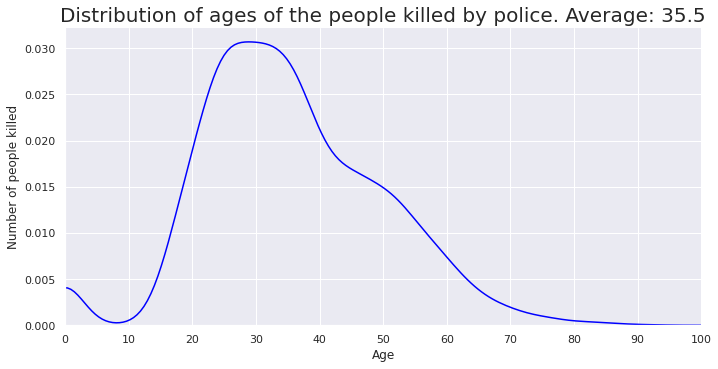

In [69]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.displot(data=df_fatalities, 
            x="age",
            aspect=2,
            # kde=True,
            kind="kde",
            # bins=bins,
            color="blue",
            )
plt.title(f'Distribution of ages of the people killed by police. Average: {round(df_fatalities.age.mean(),1)}')
plt.xlabel('Age')
plt.ylabel('Number of people killed')
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.grid(True)
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

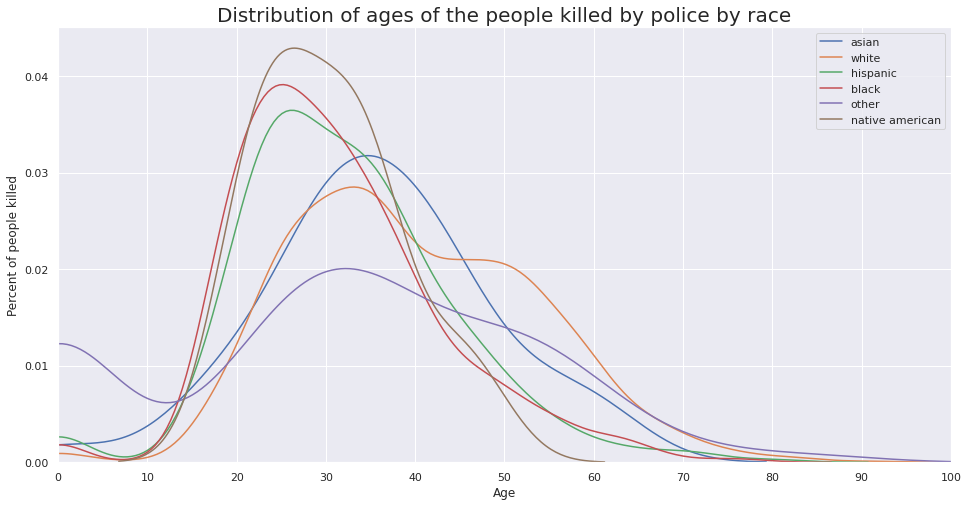

In [70]:
plt.figure(figsize=(16, 8))

dict_of_races = {'W':'white', 'B':'black', 'N':'native american', 'A':'asian', 'H':'hispanic', 'O':'other'}
races = df_fatalities.race.unique()
for race in races:
    df_race = df_fatalities[df_fatalities['race'] == race]
    sns.kdeplot(df_race.age, 
            shade=False,
            clip=(0,100),
            label=dict_of_races[race],
) 
plt.title('Distribution of ages of the people killed by police by race')
plt.xlabel('Age')
plt.ylabel(f'Percent of people killed')
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.legend()
plt.grid(True)
plt.show()

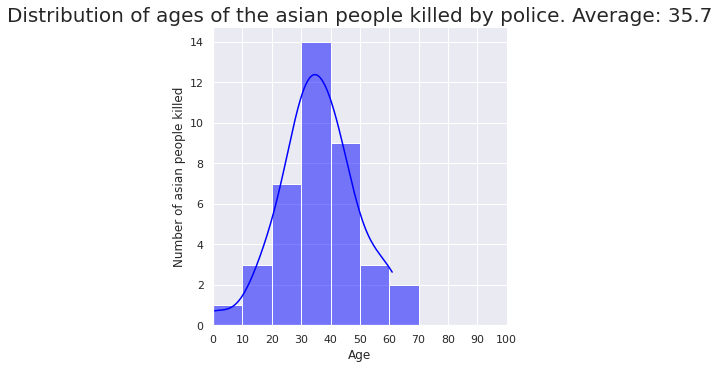

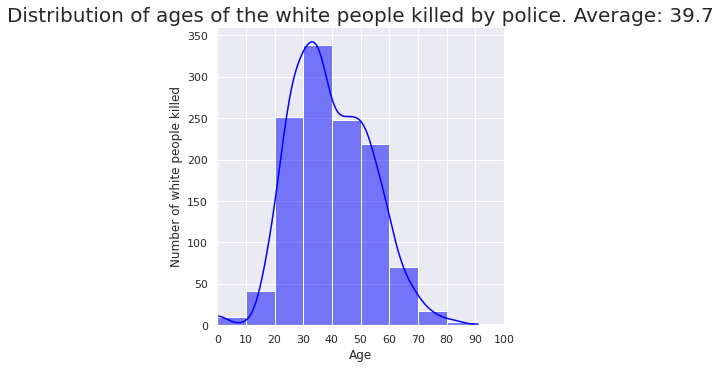

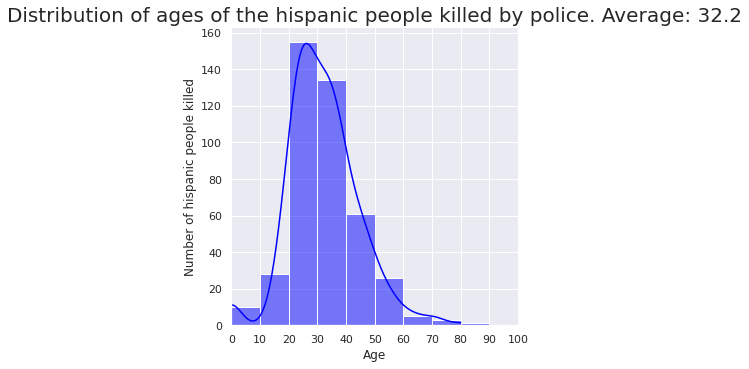

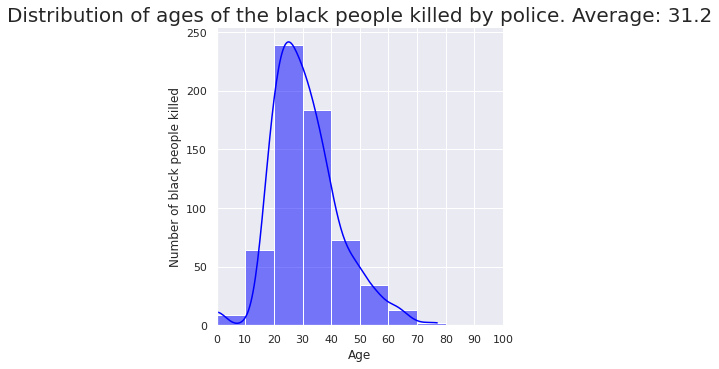

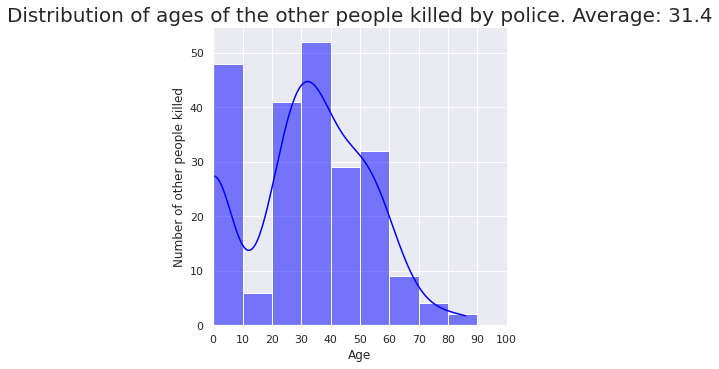

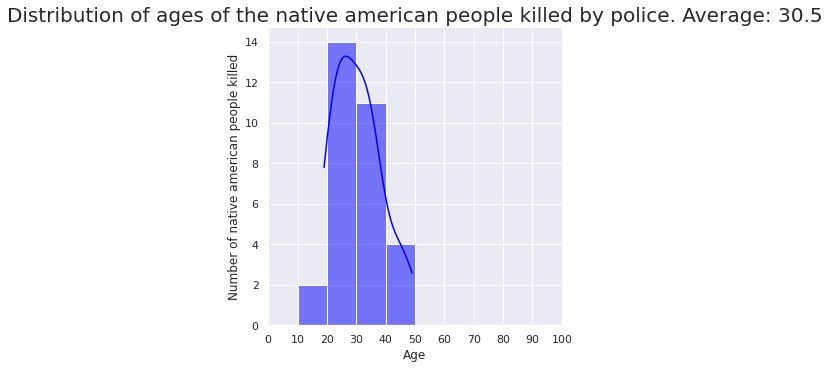

In [71]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
races = df_fatalities.race.unique()
dict_of_races = {'W':'white', 'B':'black', 'N':'native american', 'A':'asian', 'H':'hispanic', 'O':'other'}

for race in races:
    df_race = df_fatalities[df_fatalities['race'] == race]
    sns.displot(data=df_race, 
            x="age",
            aspect=1,
            kde=True,
            bins=bins,
            color="blue",
            )
    plt.title(f'Distribution of ages of the {dict_of_races[race]} people killed by police. Average: {round(df_race.age.mean(),1)}')
    plt.xlabel('Age')
    plt.ylabel(f'Number of {dict_of_races[race]} people killed')
    plt.xlim(0,100)
    plt.xticks(range(0,101,10))
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [72]:
killed_by_race

,race,killed,race_name
0,W,1201,white
1,B,618,black
2,H,423,hispanic
3,O,223,other
4,A,39,asian
5,N,31,native american


In [73]:
bar_killed_by_race = px.bar(x=killed_by_race.race_name,
             y=killed_by_race.killed,
             color=killed_by_race.killed,
             color_continuous_scale=px.colors.sequential.haline,
             title="Race of People Killed",
             hover_name=killed_by_race.race_name, 
             text=killed_by_race.killed,
             )
bar_killed_by_race.update_layout(xaxis_title='Race type', 
                  yaxis_title='Number of people killed by police',               
                  )
bar_killed_by_race.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [74]:
df_fatalities.signs_of_mental_illness.value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [75]:
print(f'Total number of people killed in database: {len(df_fatalities.signs_of_mental_illness)}')
print(f'Total number of people killed have been diagnosed with a mental illness: {len(df_fatalities[df_fatalities.signs_of_mental_illness == True])}')
print(f'Percentage of people killed have been diagnosed with a mental illness: {round(len(df_fatalities[df_fatalities.signs_of_mental_illness == True]) / len(df_fatalities.signs_of_mental_illness) *100, 1)}%')

Total number of people killed in database: 2535
Total number of people killed have been diagnosed with a mental illness: 633
Percentage of people killed have been diagnosed with a mental illness: 25.0%


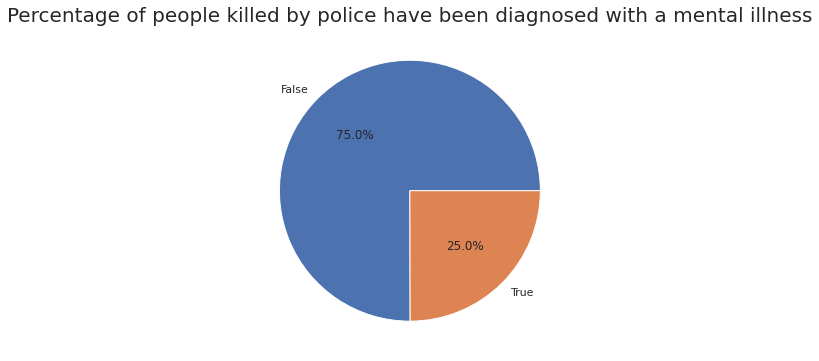

In [76]:
mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
plt.pie(mental_illness.values, labels=mental_illness.index, 
        autopct='%1.1f%%')
plt.title('Percentage of people killed by police have been diagnosed with a mental illness')
plt.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [77]:
most_dangerous_cities = df_fatalities.city.value_counts()[:10]
most_dangerous_cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [78]:
print(f"Ten most dangerous cities are: {', '.join(most_dangerous_cities.index.to_list())}.")

Ten most dangerous cities are: Los Angeles, Phoenix, Houston, Chicago, Las Vegas, San Antonio, Columbus, Austin, Miami, St. Louis.


In [79]:
bar_most_dangerous_cities = px.bar(x=most_dangerous_cities.index,
             y=most_dangerous_cities.values,
             color=most_dangerous_cities.values,
             color_continuous_scale=px.colors.sequential.Reds,
             title="Most dangerous cities",
             hover_name=most_dangerous_cities.index, 
             text=most_dangerous_cities.values,
             )
bar_most_dangerous_cities.update_layout(xaxis_title='City name', 
                  yaxis_title='Number of people killed by police',               
                  )
bar_most_dangerous_cities.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [80]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state_name,age_range
1019,1168,Willie Holderfield,14/01/16,shot,gun,40.00,M,W,Hurst,IL,True,attack,Not fleeing,False,Illinois,40-60
2461,2742,Alexander Bonds,05/07/17,shot,gun,34.00,M,B,New York,NY,False,attack,Foot,False,New York,20-40
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Kansas,20-40
2111,2351,Chance David Baker,18/02/17,shot,toy weapon,22.00,M,B,Portland,ME,True,other,Not fleeing,False,Maine,20-40
1802,2012,Dennis Kirk,03/11/16,shot,knife,64.00,M,O,Chambersburg,PA,True,attack,Not fleeing,False,Pennsylvania,60-80


In [81]:
rate_of_death_by_race = df_fatalities.groupby(by=["city", "race"]).agg({'name': pd.Series.count})
rate_of_death_by_race .reset_index(inplace=True)
rate_of_death_by_race.rename(columns={'name':'deaths'}, inplace=True)
dict_of_races = {'W':'white', 'B':'black', 'N':'native american', 'A':'asian', 'H':'hispanic', 'O':'other'}
rate_of_death_by_race["race"] = rate_of_death_by_race["race"].map(dict_of_races)
rate_of_death_by_race['total_deaths'] = rate_of_death_by_race.groupby('city')['deaths'].transform('sum')
rate_of_death_by_race.sort_values(by=['total_deaths'], ascending=False, inplace=True)
rate_of_death_by_race[:10]

city_state_map = df_fatalities.set_index('city')['state_name'].to_dict()
# rate_of_death_by_race['city_state'] = f"{rate_of_death_by_race['city']} {rate_of_death_by_race['city'].map(city_state_map)}"
rate_of_death_by_race['city_state'] = rate_of_death_by_race['city'] + ', ' + rate_of_death_by_race['city'].map(city_state_map)

In [82]:
top10_cities = rate_of_death_by_race.groupby('city')['deaths'].sum().nlargest(10).index.to_list()

In [83]:
rate_of_death_by_race = rate_of_death_by_race[rate_of_death_by_race['city'].isin(top10_cities)]
rate_of_death_by_race = rate_of_death_by_race.groupby(['city_state', 'race'])['deaths'].sum().unstack()
rate_of_death_by_race

race,asian,black,hispanic,native american,other,white
city_state,,,,,,
"Austin, Texas",NaN,3.00,2.00,NaN,NaN,13.00
"Chicago, Illinois",NaN,21.00,1.00,NaN,1.00,2.00
"Columbus, Ohio",NaN,11.00,NaN,NaN,2.00,6.00
"Houston, Texas",1.00,15.00,6.00,1.00,1.00,3.00
"Las Vegas, Nevada",NaN,3.00,5.00,NaN,4.00,9.00
"Los Angeles, California",1.00,10.00,19.00,NaN,3.00,6.00
"Miami, Florida",NaN,8.00,6.00,NaN,1.00,3.00
"Phoenix, Arizona",NaN,2.00,11.00,3.00,3.00,12.00
"San Antonio, Texas",NaN,3.00,12.00,NaN,2.00,3.00


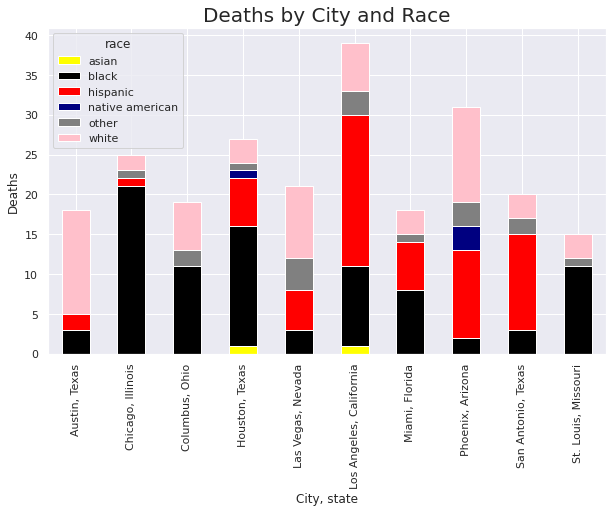

In [84]:
rate_of_death_by_race.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red', 'navy', 'grey', 'pink'])
plt.xlabel('City, state')
plt.ylabel('Deaths')
plt.title('Deaths by City and Race')
plt.show()

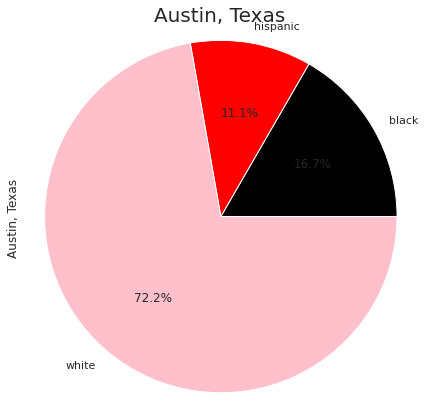

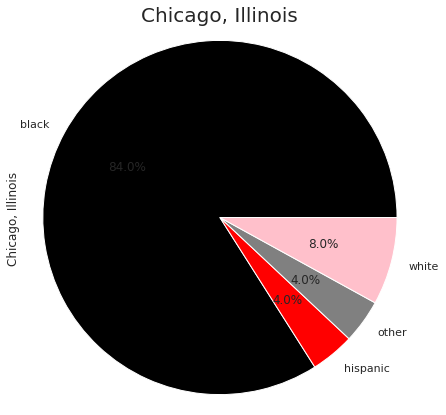

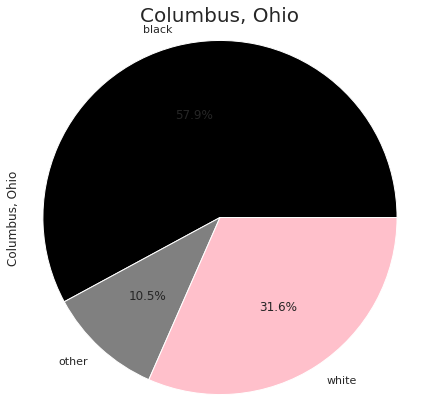

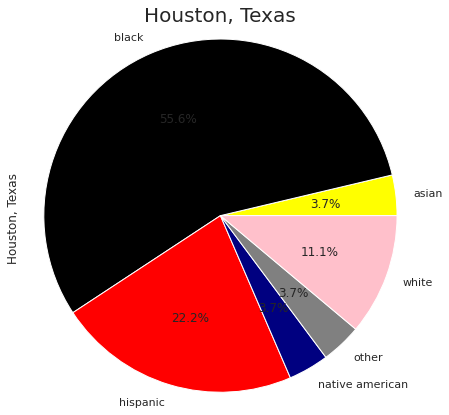

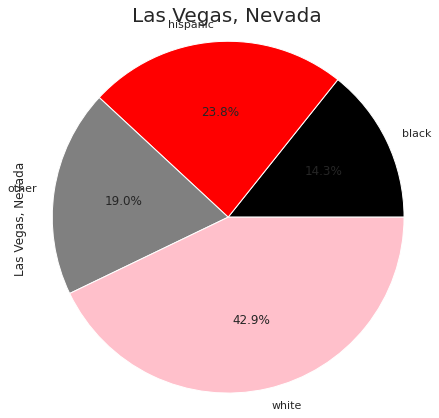

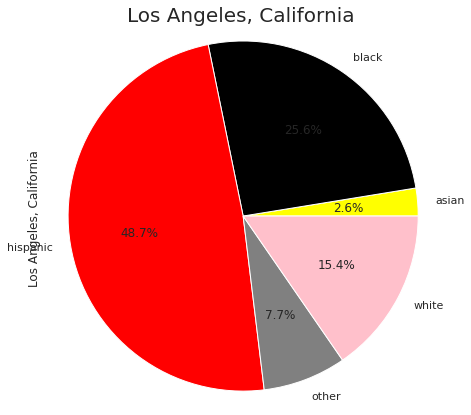

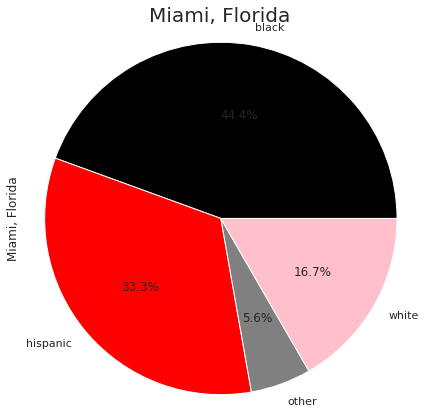

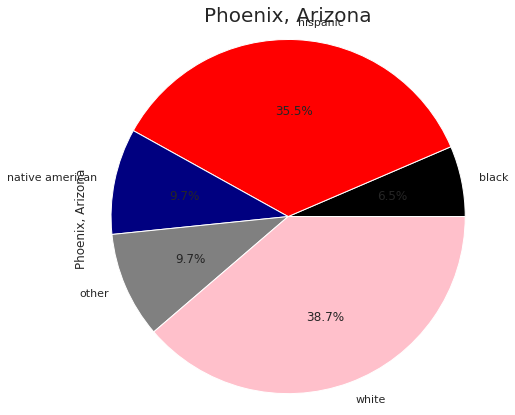

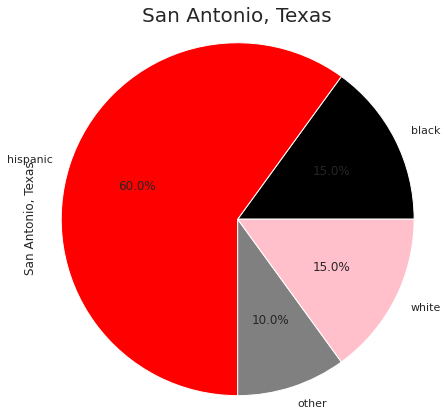

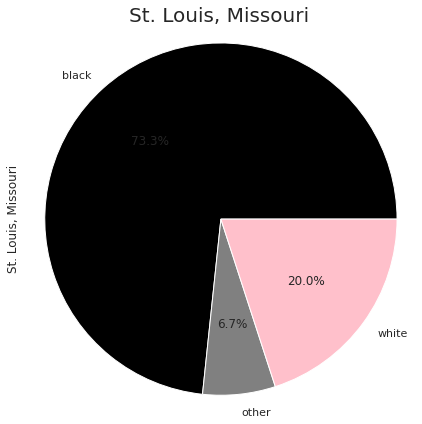

In [85]:
colors_dict = {'asian': 'yellow', 'black': 'black', 'hispanic': 'red', 'native american': 'navy', 'other': 'grey', 'white': 'pink'}
for city_state in rate_of_death_by_race.index:
    city_race_data = rate_of_death_by_race.loc[city_state]
    city_race_data = city_race_data[city_race_data.notnull()]
    plt.figure()
    city_race_data.plot.pie(autopct='%.1f%%', figsize=(7, 7), colors=[colors_dict[race] for race in city_race_data.index] )
    plt.title(city_state)
    plt.axis('equal')
    plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [86]:
def get_state_name(state_code):
    return us_states_codes_names.get(state_code)
df_fatalities['state_name'] = df_fatalities['state'].apply(get_state_name)

In [87]:
deaths_by_state = df_fatalities.groupby(by=["state", "state_name"]).agg({'name': pd.Series.count})
deaths_by_state.rename(columns={'name':'deaths'}, inplace=True)
deaths_by_state.reset_index(inplace=True)
deaths_by_state.set_index('state', inplace=True)
deaths_by_state.sort_values(by=['deaths'], ascending=False, inplace=True)

In [88]:
print(f"Ten most dangerous states are: {', '.join(deaths_by_state['state_name'][:10].to_list())}.")

Ten most dangerous states are: California, Texas, Florida, Arizona, Ohio, Oklahoma, Colorado, Georgia, North Carolina, Missouri.


In [89]:
us_states_map = px.choropleth(deaths_by_state, 
                          locations=deaths_by_state.index,
                          color=deaths_by_state['deaths'], 
                          color_continuous_scale="Reds",
                          locationmode="USA-states", 
                          scope='usa',
                          title=f"Ten most dangerous states are: {', '.join(deaths_by_state['state_name'][:10].to_list())}.",
                          hover_name='state_name',
                          hover_data=['deaths'],
                          )
us_states_map.update_layout(
    coloraxis_showscale=True,
    title=dict(
        text="<b>Number of Deaths by State</b>",
        x=0.5,
        xanchor="center",
        y=0.9,
        yanchor="top",
        font=dict(size=24, color="#444"),
    )
)
us_states_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [90]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities['year'] = df_fatalities.date.dt.year
df_fatalities['month'] = df_fatalities.date.dt.month
df_fatalities['time'] = pd.to_datetime(df_fatalities[['year', 'month']].assign(day=1))
df_fatalities.sort_values(by=['date'], ascending=True, inplace=True)

In [91]:
deaths_over_time = df_fatalities.groupby(["time"])['name'].count()
deaths_over_time = pd.Series(deaths_over_time.values, index=deaths_over_time.index)
deaths_over_time_l_chart = px.line(
    deaths_over_time,
    x=deaths_over_time.index,
    y=deaths_over_time.values,
    title='Number of killed in time'
)
deaths_over_time_l_chart.add_scatter(x=deaths_over_time.index, y=deaths_over_time.rolling(window=3).mean(),
                  name='Rolling Average (window=3)',
                  line=dict(width=2, color='green'))
deaths_over_time_l_chart.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).